## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df['user_id'].nunique() #Out of 294478 activites, there are 290584 unique users.

290584

d. The proportion of users converted.

In [5]:
# Since the 'converted' column has only two values:0/1. It might be the easiest to use mean() function 
# to check the conversion ratio. According to the result, the conversion rate is around 11.96%.
df.converted.mean() 

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
# Using a query function, we can find the number of treatment groups not fed new_page.
print(df.query('group == "treatment" and landing_page != "new_page"').shape[0])
# Below is the number of control group fed new_page.
print(df.query('group == "control" and landing_page == "new_page"').shape[0])

1965
1928


In [7]:
# The sum gives the total number of not line-up.
df.query('group == "treatment" and landing_page != "new_page"').shape[0] + df.query('group == "control" and landing_page == "new_page"').shape[0]

3893

f. Do any of the rows have missing values?

In [8]:
# From the info(), we can see that none of the rows have missing values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [15]:
# Combine the two conditions together in the query function, we can get the new dataset df2 that meets the specs.
df2 = df.query('(group == "treatment" and landing_page == "new_page") or (group == "control" and landing_page == "old_page")')

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
# Use duplicated() function & query to find the repeated user_id.
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
# Use drop() to drop one of the two rows, and check the row is really dropped using query().
df2.drop(index=1899, inplace=True)
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [17]:
# Similar to the calculation of conversion rate.
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
# Use query to filter the control group and then use mean() to find the conversion rate in that group.
df2.query('group == "control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
# Use query to filter the treatment group and then use mean() to find the conversion rate in that group.
df2.query('group == "treatment"').converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [25]:
df2.query('landing_page == "new_page"').shape[0]/df2.shape[0]

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

**From the results above, there isn't sufficient evidence to say that the new treatment page leads to more conversions. Actually, the conversion rate of the treatment group is even a little bit lower than the conversion rate of the control group.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$H_{0}$** : **$p_{old}$** $\geq$ **$p_{new}$** 
<br>
**$H_{1}$** : **$p_{old}$** $<$ **$p_{new}$** 

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [26]:
# Since we are assuming p_new has "true" success rate equal to the converted success rate regardless of page, we should calculate
# it as following
p_new = df2.converted.mean()
print(p_new)

0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [27]:
# Since we are assuming p_old has "true" success rate equal to the converted success rate regardless of page, we should calculate
# it as following
p_old = df2.converted.mean()
print(p_old)

0.11959708724499628


c. What is $n_{new}$?

In [28]:
n_new = df2.query('group == "treatment"').shape[0]
print(n_new)

145310


d. What is $n_{old}$?

In [29]:
n_old = df2.query('group == "control"').shape[0]
print(n_old)

145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [30]:
# The values of conversion is either 0 or 1. Thus, we can use the random.choice() function to simulate it.
new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new, p_new])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [31]:
old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old, p_old])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [32]:
# To find p, we can simply find the mean of the simulated data.
# p_new of simulated data
p_new_sim = new_page_converted.mean()
print(p_new_sim)
# p_old of simulated data
p_old_sim = old_page_converted.mean()
print(p_old_sim)
# Now calculate the difference
print(p_new_sim - p_old_sim)

0.11945495836487509
0.11967041590374052
-0.00021545753886542673


In [33]:
# Notice that I used random.choice() above because part e & f requires me to store 1's and 0's. 
# However, in my opinion, if our ultimate goal is to get p_new_sim & p_old_sim, maybe a better way is to use random.binomial()
# Since random.binomial only returns the number of successes rather than 1's and 0's, I cannot store the result of each trial.
# Below is the code of using random.binomial() to calculate p_new_sim/p_old_sim
p_new_sim = np.random.binomial(n_new, p_new)/n_new
p_old_sim = np.random.binomial(n_old, p_old)/n_old
p_new_sim, p_old_sim

(0.11964764985204046, 0.11840384377108086)

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [34]:
p_diffs = []
for i in range(10000):
    new_page_converted = np.random.choice([0,1], size=n_new, p=[1-p_new, p_new])
    old_page_converted = np.random.choice([0,1], size=n_old, p=[1-p_old, p_old]) # Notice that p_new is equal to p_old
    p_new_sim = new_page_converted.mean()
    p_old_sim = old_page_converted.mean()
    p_diffs.append(p_new_sim - p_old_sim)

In [35]:
# Here I provide how to get p_diffs2 using random.binomial(), I noticed that this code runs way faster than the above code.
p_diffs2 = []
for i in range(10000):
    p_new_sim = np.random.binomial(n_new, p_new)/n_new
    p_old_sim = np.random.binomial(n_old, p_old)/n_old
    p_diffs2.append(p_new_sim - p_old_sim)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([1.500e+01, 1.310e+02, 6.490e+02, 1.978e+03, 3.149e+03, 2.555e+03,
        1.150e+03, 3.280e+02, 4.200e+01, 3.000e+00]),
 array([-0.00456532, -0.00359689, -0.00262847, -0.00166004, -0.00069161,
         0.00027681,  0.00124524,  0.00221366,  0.00318209,  0.00415052,
         0.00511894]),
 <a list of 10 Patch objects>)

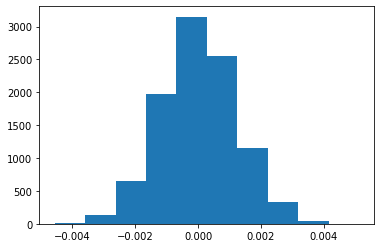

In [36]:
# Notice that the histogram below is plotted from the simulated data using random.choice()
plt.hist(p_diffs)

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [37]:
# This is the observed p_diffs in ab_data.csv
obs_diff = df2.query('group == "treatment"').converted.mean() - df2.query('group == "control"').converted.mean()

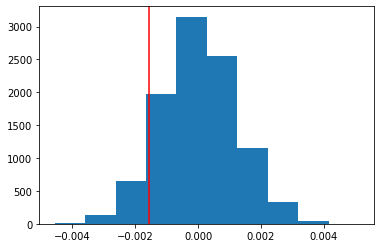

In [38]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff, color='red')

In [39]:
# I have to convert p_diffs to numpy array to do this index filtering, otherwise I will get an error message
p_diffs = np.array(p_diffs)
# This is how p value is calculated. 
(p_diffs > obs_diff).mean()

0.9112

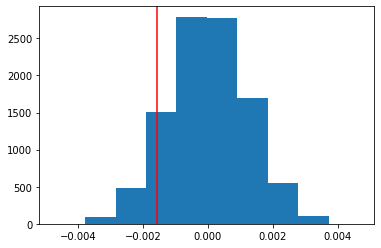

In [40]:
# Here, I plot the histogram of p_diffs2, which is the data obtained using random.binomial()
plt.hist(p_diffs2);
plt.axvline(x=obs_diff, color='red');

In [41]:
# Again, I repeat the same code as I did to p_diffs to get the p value of p_diffs2
p_diffs2 = np.array(p_diffs2)
(p_diffs2 > obs_diff).mean()

0.9045

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**What I computed in part j is the p value of the sampling distribution. p value here means that assuming our null hypothesis is true($p_{old}$ is no less than $p_{new}$), the probability of observing our statistic(in this case the p_diff in ab_data.csv) or one more extreme in favor of the alternative hypothesis($p_{old}$ less than $p_{new}$). My result shows that p value is around 90%, which is a fairly high probability. This means that we cannot reject the null hypothesis. Thus, the new pages don't yield higher conversion rate than the old pages based on our sample.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [26]:
import statsmodels.api as sm

convert_old = df2.query('group == "control" and converted == 1').shape[0]
convert_new = df2.query('group == "treatment" and converted == 1').shape[0]
n_old = df2.query('group == "control"').shape[0]
n_new = df2.query('group == "treatment"').shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [43]:
stat, pval = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], value=0, alternative='smaller')
print("The p value is {0:0.4f}".format(pval))
print("The z score is {}".format(stat))

The p value is 0.9051
The z score is 1.3109241984234394


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**From the above code, we can see that the null hypothesis is $p_{old}$ is no less than than $p_{new}$ while alternative hypothesis is that $p_{old}$ is smaller than $p_{new}$. The p value 0.9051 is very large, which means that we cannot reject the null hypothesis. Thus, the new pages don't yield higher conversion rate than the old pages based on our sample. This result is consistent with the findings in parts j. and k. For this lower tail z-test, if our z score is around 1.31. Then the area under the standard normal distribution curve to the left of the z score 1.31 is around 0.905, which is exactly our p value!**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [20]:
# Again, df2 is the dataset I'm working on.
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [22]:
# Use pandas' get_dummies function to create two new columns 'old_page' and 'new_page'. 
df2.loc[:, 'ab_page'] = pd.get_dummies(df2['landing_page'])['new_page']

In [23]:
# Add an intercept column to df2
df2.loc[:,'intercept'] = 1

In [24]:
# Check whether those columns were added successfully. 
df2.head()

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,0,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [27]:
logit_mod = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 02 Sep 2020   Pseudo R-squ.:               8.077e-06
Time:                        21:58:23   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**The p-value associated with ab_page is 0.190. In the regression model above, the null hypothesis is that the coefficient of ab_page is equal to zero and the alternative hypothesis is that the coefficient of ab_page is not equal to zero. Here p value is a number to determine whether or not the ab_page variable is useful to predict the conversion result. However, in part II, the null hypothesis is $p_{old}$ is no less than than $p_{new}$ while alternative hypothesis is that $p_{old}$ is smaller than $p_{new}$. If our significance level is 0.05, because p-value 0.19 > 0.05, we cannot reject the null hypothesis that the coefficient of ab_page is equal to zero. Thus, it means that the new page might not be a variable that significantly influences the conversion rate as compared to the old page.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**I think it's always a good habit to consider multiple factors, since there might be more than one factors that might influence the response variable. Adding all possible factors to the regression model might give us better prediction of the response variable. However, there are also disadvantages associated with adding additional terms into the regression model. For example, the additional variable might be correlated with the original variales in the model and thus can lead to the multicollinearity in the regression model**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [29]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [34]:
# Check the form of the new DataFrame df_new 
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept
user_id,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1


In [36]:
# Check the unique values of the 'country' column
df_new.country.unique()
# From the output, we can see there are only three countries listed in the 'country' column

array(['UK', 'US', 'CA'], dtype=object)

In [40]:
### Create the necessary dummy variables
df_new[['UK', 'US']] = pd.get_dummies(df_new['country'])[['UK', 'US']]
### Since there are three dummy variables, I need two columns for them. Here I chose 'UK' and 'US' as the two new columns 
### added to the DataFrame df_new 

In [42]:
### Check df_new to confirm that the two dummy columns have been added successfully.
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


In [44]:
logit_mod_02 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US']])
results_02 = logit_mod_02.fit()
results_02.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 02 Sep 2020   Pseudo R-squ.:               2.323e-05
Time:                        22:15:32   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
US             0.0408      0.027      1.516      0.130      -0.012       0.093
==============================================================================
"""

**Since the p-values for UK & US are all larger than 0.05, I would say that the country does not have an obvious impact on conversion.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [46]:
### To get the higher order interaction columns, I simply multiply the two country columns to the 'ab_page' column.
df_new['UK_ab_page'] = df_new['UK']*df_new['ab_page']
df_new['US_ab_page'] = df_new['US']*df_new['ab_page']

In [48]:
### Check df_new to confirm that the two interaction columns have been added successfully.
df_new.head()

,country,timestamp,group,landing_page,converted,ab_page,intercept,UK,US,UK_ab_page,US_ab_page
user_id,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,0,1,1,0,0,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,0,1,1,0,0,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0,1,0


In [49]:
### Fit Your Linear Model And Obtain the Results
logit_mod_03 = sm.Logit(df_new['converted'], df_new[['intercept', 'ab_page', 'UK', 'US', 'UK_ab_page', 'US_ab_page']])
results_03 = logit_mod_03.fit()
results_03.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 02 Sep 2020   Pseudo R-squ.:               3.482e-05
Time:                        22:43:22   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page       -0.0674      0.052     -1.297      0.195      -0.169       0.034
UK             0.0118      0.040      0.296      0.767      -0.066       0.090
US             0.0175      0.038      0.465      0.642      -0.056       0.091
UK_ab_page     0.0783      0.057      1.378      0.168      -0.033       0.190
US_ab_page     0.0469      0.054      0.872      0.383      -0.059       0.152
==============================================================================
"""

**Based on the summary, all p-values are larger than 0.05, that means neither the interaction between page and country nor the page & country themselves have a significant effect on conversion.**

## Resources
1. The Udacity classroom of Practical Statistics
2. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.join.html
3. https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas

<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! 

### Gather Submission Materials

Once you are satisfied with the status of your Notebook, you should save it in a format that will make it easy for others to read. You can use the __File -> Download as -> HTML (.html)__ menu to save your notebook as an .html file. If you are working locally and get an error about "No module name", then open a terminal and try installing the missing module using `pip install <module_name>` (don't include the "<" or ">" or any words following a period in the module name).

You will submit both your original Notebook and an HTML or PDF copy of the Notebook for review. There is no need for you to include any data files with your submission. If you made reference to other websites, books, and other resources to help you in solving tasks in the project, make sure that you document them. It is recommended that you either add a "Resources" section in a Markdown cell at the end of the Notebook report, or you can include a `readme.txt` file documenting your sources.

### Submit the Project

When you're ready, click on the "Submit Project" button to go to the project submission page. You can submit your files as a .zip archive or you can link to a GitHub repository containing your project files. If you go with GitHub, note that your submission will be a snapshot of the linked repository at time of submission. It is recommended that you keep each project in a separate repository to avoid any potential confusion: if a reviewer gets multiple folders representing multiple projects, there might be confusion regarding what project is to be evaluated.

It can take us up to a week to grade the project, but in most cases it is much faster. You will get an email once your submission has been reviewed. If you are having any problems submitting your project or wish to check on the status of your submission, please email us at dataanalyst-project@udacity.com. In the meantime, you should feel free to continue on with your learning journey by beginning the next module in the program.